In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with sqlite3.connect("../laliga.sqlite") as conn:
    df = pd.read_sql("SELECT * FROM Matches", con = conn)

df = df.loc[-df.score.isnull()]


In [3]:
df

,season,division,matchday,date,time,home_team,away_team,score
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2
2,1928-1929,1,1,2/10/29,None,Real Madrid,Catalunya,5:0
3,1928-1929,1,1,2/10/29,None,Donostia,Athletic,1:1
4,1928-1929,1,1,2/12/29,None,Racing,Barcelona,0:2
...,...,...,...,...,...,...,...,...
48585,2021-2022,2,3,8/28/21,10:00 PM,Ponferradina,Girona,2:1
48586,2021-2022,2,3,8/29/21,5:00 PM,SD Amorebieta,UD Almería,2:1
48587,2021-2022,2,3,8/29/21,7:30 PM,CD Lugo,Real Valladolid,0:2
48588,2021-2022,2,3,8/29/21,7:30 PM,Real Sociedad B,CF Fuenlabrada,0:0


### Question 1:
Is it true that the home team is more likely to win? Make a pie chart showing the result distribution (whether home team wins, visitor team wins, or there's a tie) of all matches in the data. Write in the plot the percentage of each category.

In [4]:
def parse_score(score_as_string):
        if score_as_string is None: 
            return None
        home_goals, away_goals = score_as_string.split(":")
        home_goals = int(home_goals)
        away_goals = int(away_goals)
        if home_goals > away_goals: 
            return "1"
        if away_goals > home_goals: 
            return "2" 
        else: 
            return "X"
        

In [5]:
df['result'] = df['score'].apply(parse_score)

<AxesSubplot:title={'center':'Result distribution'}, ylabel='result'>

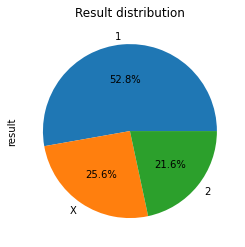

In [6]:
df["result"].value_counts().plot(kind="pie",title = "Result distribution",autopct='%1.1f%%')

### Question 2:
What are the top ten scoring teams of all time? What are the ten teams
that concede the most? Make two bar plot charts showing each of them.
Consider only matches played in 1st division.
What have been the biggest wins? Of course, when we say biggest we mean
those with the highest goal difference. Show the top ten of them in a table.


In [27]:
df.loc[df['division'] == 1] = df2
df2[['home_goals','away_goals']] = df2['score'].str.split(":",expand=True,)
df2 = df2.astype({"home_goals": int, "away_goals": int})
df2

,season,division,matchday,date,time,home_team,away_team,score,result,home_goals,away_goals,Difference_goals
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3,2,2,3,1
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2,1,3,2,1
2,1928-1929,1,1,2/10/29,None,Real Madrid,Catalunya,5:0,1,5,0,5
3,1928-1929,1,1,2/10/29,None,Donostia,Athletic,1:1,X,1,1,0
4,1928-1929,1,1,2/12/29,None,Racing,Barcelona,0:2,2,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
48203,2021-2022,1,3,8/28/21,10:00 PM,Real Betis,Real Madrid,0:1,2,0,1,1
48204,2021-2022,1,3,8/29/21,5:00 PM,Barcelona,Getafe,2:1,1,2,1,1
48205,2021-2022,1,3,8/29/21,7:30 PM,Cádiz CF,CA Osasuna,2:3,2,2,3,1
48206,2021-2022,1,3,8/29/21,7:30 PM,Rayo Vallecano,Granada CF,4:0,1,4,0,4


In [34]:
goals_by_team_home = df2.groupby("home_team")["home_goals"].sum()
goals_by_team_away = df2.groupby("away_team")["away_goals"].sum()
total_goals = goals_by_team_home + goals_by_team_away
top_scored_goals = total_goals.sort_values(ascending= False).head(10)


In [35]:
conceded_home = df2.groupby("away_team")["home_goals"].sum()
conceded_away = df2.groupby("home_team")["away_goals"].sum()
conceded_goals = conceded_home + conceded_away
top_conceded_goals = conceded_goals.sort_values(ascending= False).head(10)
top_conceded_goals.index

Index(['Espanyol', 'Athletic', 'Valencia', 'Sevilla FC', 'Real Madrid',
       'Barcelona', 'Real Sociedad', 'Atlético Madrid', 'Real Zaragoza',
       'Celta de Vigo'],
      dtype='object', name='away_team')

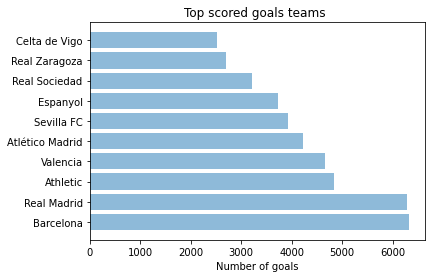

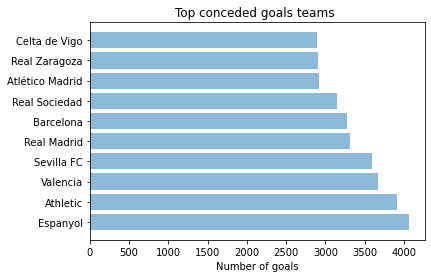

In [36]:
plt.barh(top_scored_goals.index, top_scored_goals, align='center', alpha=0.5)
plt.xlabel('Number of goals')
plt.title('Top scored goals teams ')
plt.show()

plt.barh(top_conceded_goals.index, top_conceded_goals, align='center', alpha=0.5)
plt.xlabel('Number of goals')
plt.title('Top conceded goals teams ')
plt.show()

In [23]:
df2['Difference_goals'] = abs(df2['home_goals'] - df2['away_goals'])

In [41]:
df2.sort_values('Difference_goals',ascending= False).head(10)

,season,division,matchday,date,time,home_team,away_team,score,result,home_goals,away_goals,Difference_goals
225,1930-1931,1,10,2/8/31,None,Athletic,Barcelona,12:1,1,12,1,11
936,1940-1941,1,1,9/29/40,None,Sevilla FC,Barcelona,11:1,1,11,1,10
1168,1941-1942,1,15,1/11/42,None,Athletic,Celta de Vigo,10:0,1,10,0,10
2787,1950-1951,1,11,11/19/50,None,Athletic,Lérida,10:0,1,10,0,10
1071,1941-1942,1,1,9/28/41,None,Sevilla FC,Real Oviedo,10:0,1,10,0,10
2574,1949-1950,1,8,10/23/49,None,Celta de Vigo,Gimnàstic,10:1,1,10,1,9
2771,1950-1951,1,9,11/5/50,None,Dep. La Coruña,Lérida,10:1,1,10,1,9
4745,1958-1959,1,15,12/28/58,None,Athletic,Real Gijón,9:0,1,9,0,9
2969,1951-1952,1,3,9/23/51,None,Athletic,Real Zaragoza,10:1,1,10,1,9
2537,1949-1950,1,2,9/11/49,None,Barcelona,Gimnàstic,10:1,1,10,1,9


### Question 3:
There has been a lot of discussion about how LaLiga’s television rights have
changed game schedules in the last years. Make a bar plot chart showing
the number of matches played each weekday, and make also a histogram
of match time. Compare this two graphics between seasons 2000-2001 and
2020-2021.



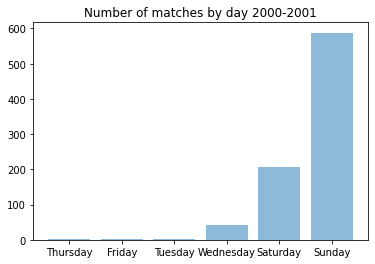

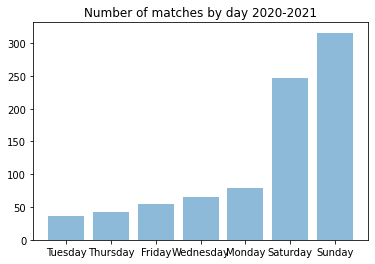

In [17]:
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.day_name()

matchdays_2000_2001 = df.loc[df['season']=='2000-2001'].value_counts("day_of_week").sort_values()
matchdays_2020_2021 = df.loc[df['season']=='2020-2021'].value_counts("day_of_week").sort_values()


plt.bar(matchdays_2000_2001.index,matchdays_2000_2001 , align='center', alpha=0.5)
plt.title('Number of matches by day 2000-2001')
plt.show()

plt.bar(matchdays_2020_2021.index,matchdays_2020_2021 , align='center', alpha=0.5)
plt.title('Number of matches by day 2020-2021')
plt.show()


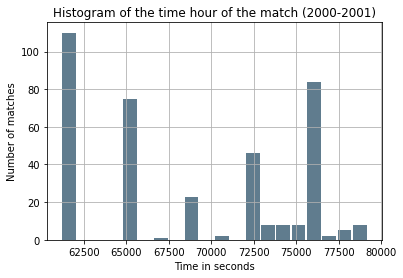

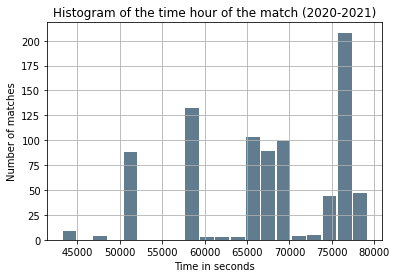

In [44]:
df['time_seconds'] = pd.to_datetime(df['time']).dt.time
df['time_seconds'] = pd.to_timedelta(df['time_seconds'].astype(str)).dt.total_seconds()

matchtime_2000_2001 = df.loc[df['season']=='2000-2001']
matchtime_2020_2021 = df.loc[df['season']=='2020-2021']


matchtime_2000_2001['time_seconds'].plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e')
plt.title('Histogram of the time hour of the match (2000-2001)')
plt.ylabel('Number of matches')
plt.xlabel('Time in seconds')
plt.show()

matchtime_2020_2021['time_seconds'].plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e')
plt.title('Histogram of the time hour of the match (2020-2021)')
plt.xlabel('Time in seconds')
plt.ylabel('Number of matches')
plt.show()

,season,division,matchday,date,time,home_team,away_team,score,result,home_goals,away_goals,Difference_goals,day_of_week,time_col,time_seconds
0,1928-1929,1,1,2029-02-10,None,Arenas Club,Athletic Madrid,2:3,2,2,3,1,Saturday,NaN,NaN
1,1928-1929,1,1,2029-02-10,None,Espanyol,Real Unión,3:2,1,3,2,1,Saturday,NaN,NaN
2,1928-1929,1,1,2029-02-10,None,Real Madrid,Catalunya,5:0,1,5,0,5,Saturday,NaN,NaN
3,1928-1929,1,1,2029-02-10,None,Donostia,Athletic,1:1,X,1,1,0,Saturday,NaN,NaN
4,1928-1929,1,1,2029-02-12,None,Racing,Barcelona,0:2,2,0,2,2,Monday,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48585,2021-2022,2,3,2021-08-28,10:00 PM,Ponferradina,Girona,2:1,1,2,1,1,Saturday,22:00:00,79200.0
48586,2021-2022,2,3,2021-08-29,5:00 PM,SD Amorebieta,UD Almería,2:1,1,2,1,1,Sunday,17:00:00,61200.0
48587,2021-2022,2,3,2021-08-29,7:30 PM,CD Lugo,Real Valladolid,0:2,2,0,2,2,Sunday,19:30:00,70200.0
48588,2021-2022,2,3,2021-08-29,7:30 PM,Real Sociedad B,CF Fuenlabrada,0:0,X,0,0,0,Sunday,19:30:00,70200.0


### Question 4:
Build a cross results table for season 2020-2021 (1st division). Figure 1 is an
example taken from Wikipedia. Try to make it the most similar to this one:
use team abbreviations as column names and paint the background of each
cell according to result (green in case local team wins and red in case visitor
team wins). Also, could you model the intensity of this background color
with the goal difference from the match?

Write a function that, given the season and division, plots the cross results table. Function prototype should be like plot_cross_results_table(season, division) and return the plot object.

In [147]:
sel_season = "2011-2012"
local_teams = df['home_team'].loc[(df['season'] == sel_season) & (df['division'] == 1)].unique()
scores_away = [df['score'].loc[(df['season'] == sel_season) & (df['division'] == 1) & (df['away_team'] == team)] for team in away_teams]

dict_data = dict(zip(local_teams, scores_locals))
print(dict_data)

table_cross = pd.DataFrame.from_dict(dict_data)
table_cross

{'Racing': 25678    0:0
25703    1:2
25712    0:1
25732    0:0
25748    0:2
25773    0:0
25797    0:0
25817    1:3
25844    2:0
25867    1:2
25879    0:2
25901    1:1
25919    1:1
25945    1:3
25971    0:1
25997    0:1
26009    3:0
26036    1:1
26050    0:1
Name: score, dtype: object, 'Espanyol': 25679    2:0
25693    2:1
25717    2:0
25728    1:0
25755    1:1
25775    1:3
25793    3:3
25815    2:0
25832    2:1
25850    0:4
25885    0:0
25899    1:2
25925    2:1
25944    1:0
25959    0:3
25985    4:1
26015    0:1
26037    1:4
26056    0:0
Name: score, dtype: object, 'Real Sociedad': 25680    0:2
25705    1:3
25726    1:1
25744    0:0
25774    0:1
25792    2:1
25816    0:2
25830    0:0
25853    3:1
25860    2:2
25884    2:4
25907    0:4
25924    0:1
25931    1:0
25964    2:1
25983    0:3
26002    0:0
26021    2:1
26042    1:3
Name: score, dtype: object, 'Real Betis': 25681    0:1
25698    0:0
25724    1:0
25735    0:2
25752    1:1
25776    2:2
25796    0:0
25826    2:1
25843    1:2
2586

,Racing,Espanyol,Real Sociedad,Real Betis,CA Osasuna,Rayo Vallecano,Málaga CF,Levante,Real Madrid,Villarreal,Sporting Gijón,Valencia,Granada CF,Atlético Madrid,Athletic,RCD Mallorca,Getafe,Real Zaragoza,Sevilla FC,Barcelona
25678,0:0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25679,NaN,2:0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25680,NaN,NaN,0:2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25681,NaN,NaN,NaN,0:1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25682,NaN,NaN,NaN,NaN,1:1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0:1
26054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2:1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26055,NaN,NaN,NaN,NaN,1:2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26056,NaN,0:0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
